In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
data.shape

(768, 9)

In [6]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
data['Outcome'].value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

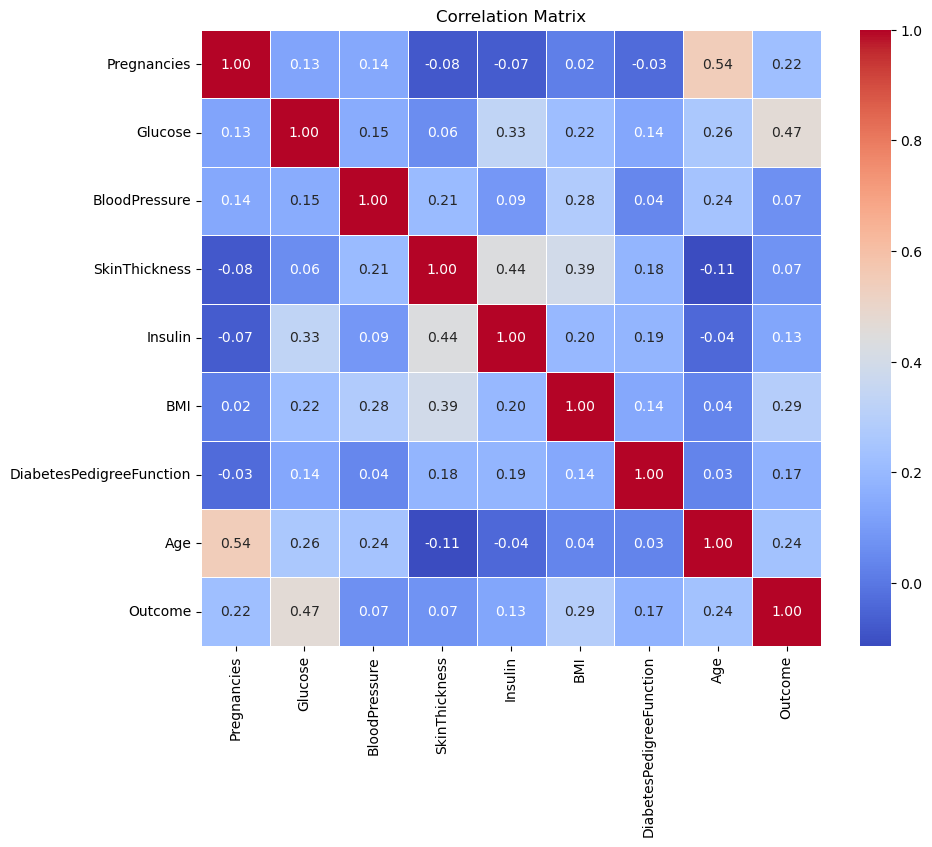

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

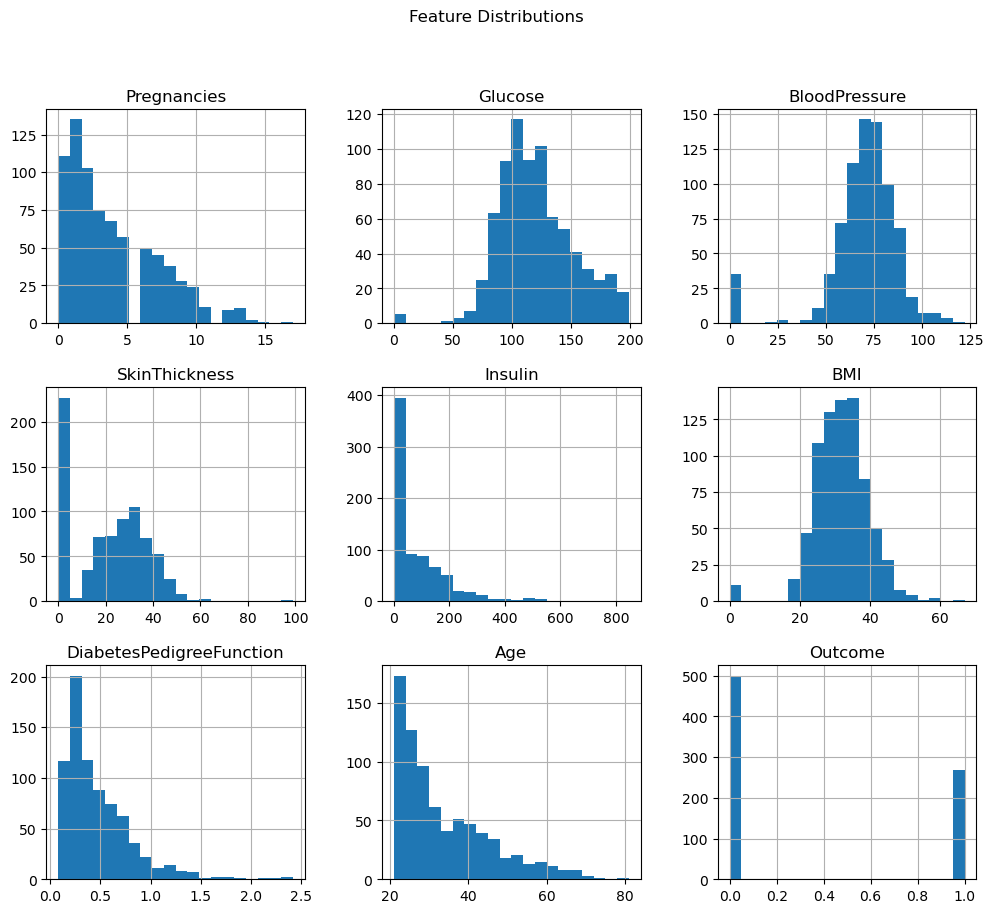

In [11]:
data.hist(figsize=(12, 10), bins=20)
plt.suptitle('Feature Distributions')
plt.show()

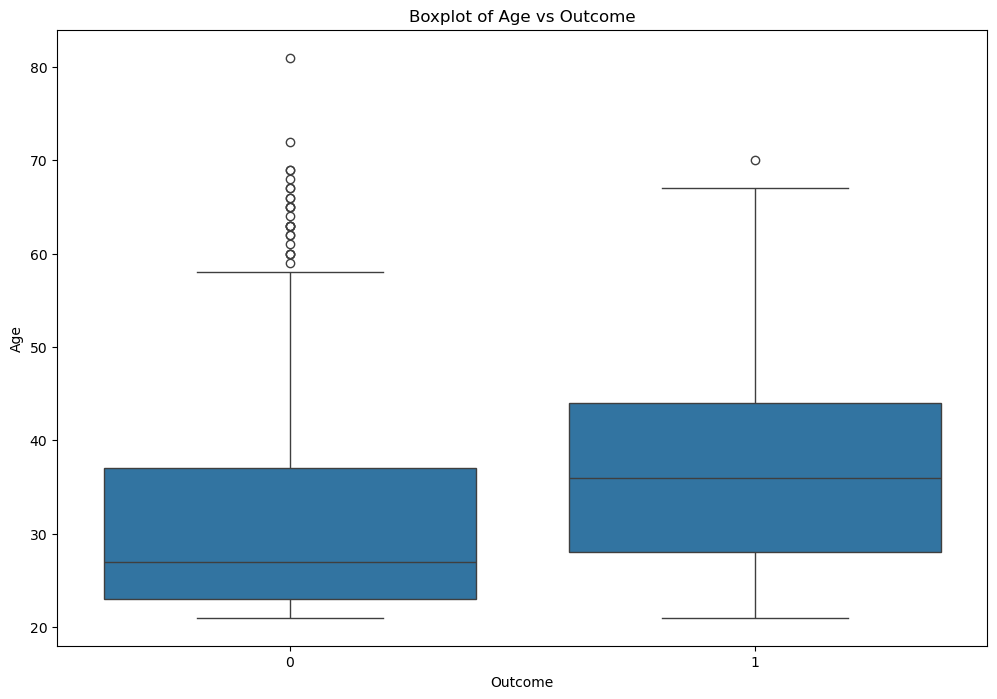

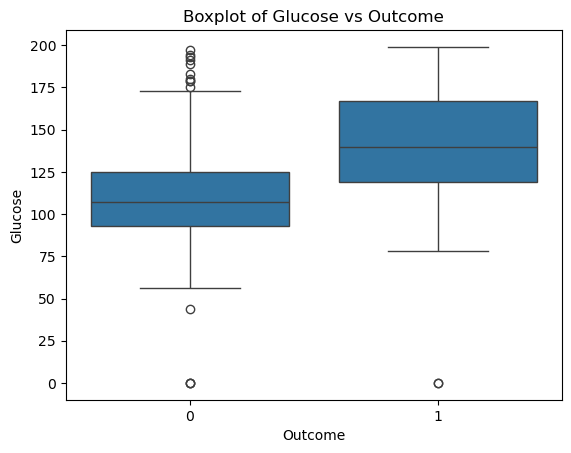

In [12]:
# Boxplots to see distributions relative to Outcome
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Outcome', y='Age')
plt.title('Boxplot of Age vs Outcome')
plt.show()

sns.boxplot(data=data, x='Outcome', y='Glucose')
plt.title('Boxplot of Glucose vs Outcome')
plt.show()

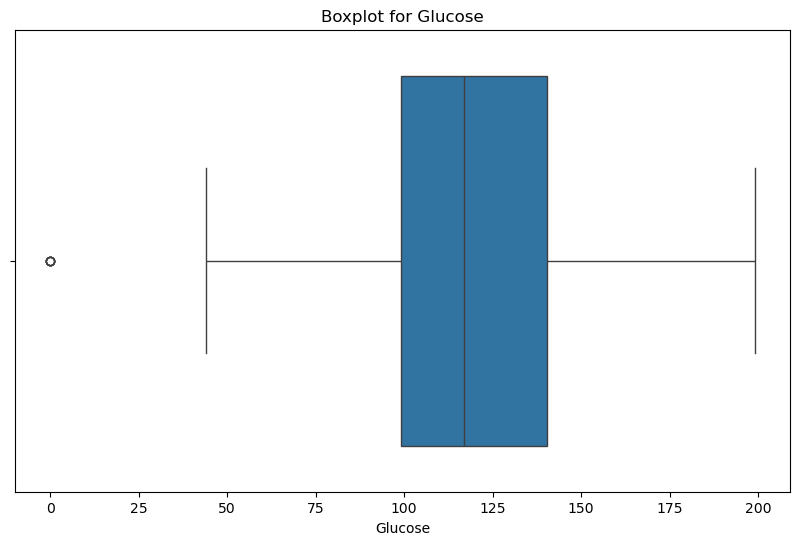

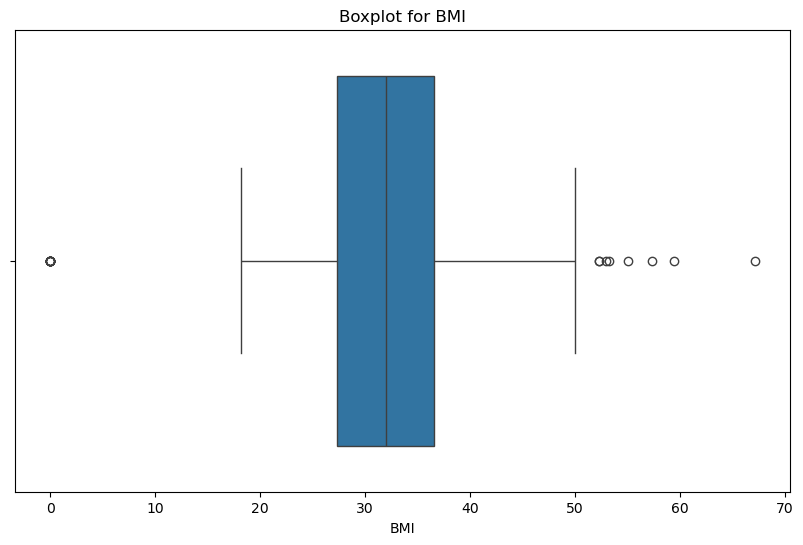

In [13]:
# Boxplot for checking outliers in Glucose and BMI
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Glucose'])
plt.title('Boxplot for Glucose')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=data['BMI'])
plt.title('Boxplot for BMI')
plt.show()


In [14]:
from sklearn.preprocessing import StandardScaler


features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
scaler = StandardScaler()

# Standardize the features
data[features] = scaler.fit_transform(data[features])

# Check if scaling was successful
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [15]:
from sklearn.model_selection import train_test_split

X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=42)

In [17]:
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [18]:
from sklearn.metrics import accuracy_score, classification_report
y_pred_gb = model.predict(X_test)

# Evaluate the model
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.7532467532467533


In [19]:
from sklearn.svm import SVC

svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("SVM Model Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Model Performance
Accuracy: 0.7467532467532467


In [20]:
from sklearn.neural_network import MLPClassifier

# Initialize the Neural Network model (MLP)
nn_model = MLPClassifier(random_state=42)

# Train the model on the scaled training data
nn_model.fit(X_train, y_train)

# Predict on the test data
y_pred_nn = nn_model.predict(X_test)

C:\Users\mariu\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [21]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

model_names = ["SVM", "Gradient Boosting", "Neural Network"]
models = [svm_model, model, nn_model]  # Make sure these are your correct model variables

for name, model in zip(model_names, models):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    print(f"{name} — F1 Score: {f1:.3f}, AUC-ROC: {auc:.3f}")


SVM — F1 Score: 0.629, AUC-ROC: 0.793
Gradient Boosting — F1 Score: 0.627, AUC-ROC: 0.841
Neural Network — F1 Score: 0.592, AUC-ROC: 0.817


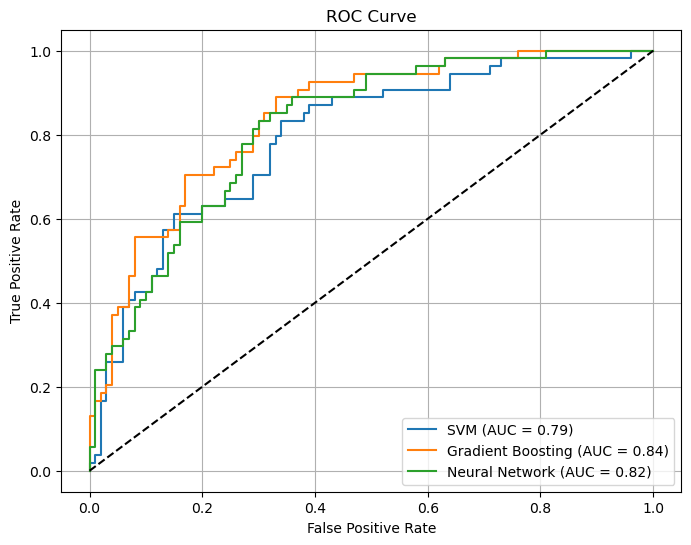

In [57]:
plt.figure(figsize=(8, 6))

for name, model in zip(model_names, models):
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
